In [1]:
# Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("D:/backup/Master_Thesis_Project/bu/7.csv")

In [3]:
train_data.head()

,S.No,heart_rate,blood_oxygen,body_temp,health_condition
0,1,83,100,33,Normal
1,2,95,97,32,Normal
2,3,90,96,40,Normal
3,4,107,99,32,Abnormal
4,5,90,98,34,Normal


In [4]:
train_data.shape

(99, 5)

In [5]:
train_data.isnull().any()

S.No                False
heart_rate          False
blood_oxygen        False
body_temp           False
health_condition    False
dtype: bool

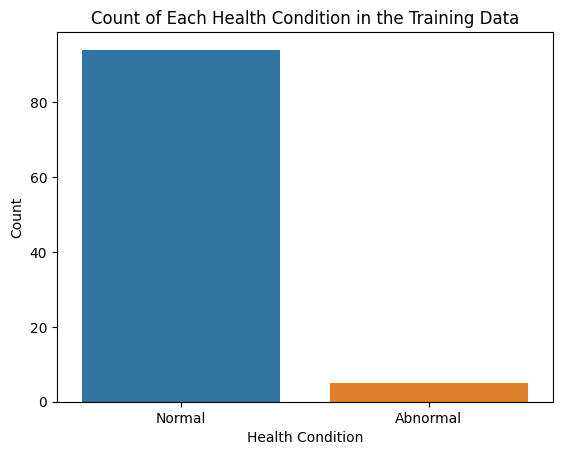

In [6]:
# Plot a bar graph to show the count of each health condition in the training data
sns.countplot(x='health_condition', data=train_data)
plt.title('Count of Each Health Condition in the Training Data')
plt.xlabel('Health Condition')
plt.ylabel('Count')
plt.show()

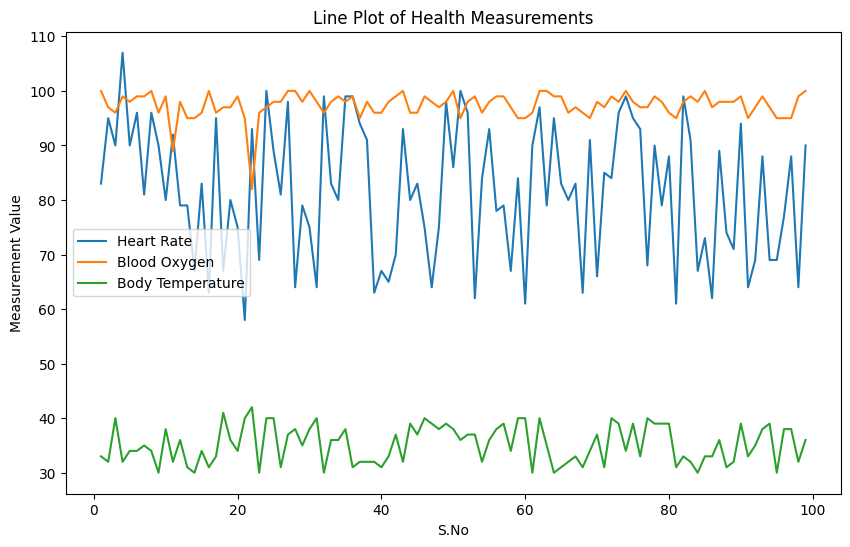

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
train_data = pd.read_csv('D:/backup/Master_Thesis_Project/bu/7.csv')

# Create a line plot of heart rate, blood oxygen, and body temperature
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(train_data['S.No'], train_data['heart_rate'], label='Heart Rate')
ax.plot(train_data['S.No'], train_data['blood_oxygen'], label='Blood Oxygen')
ax.plot(train_data['S.No'], train_data['body_temp'], label='Body Temperature')

ax.set_title('Line Plot of Health Measurements')
ax.set_xlabel('S.No')
ax.set_ylabel('Measurement Value')
ax.legend()

plt.show()

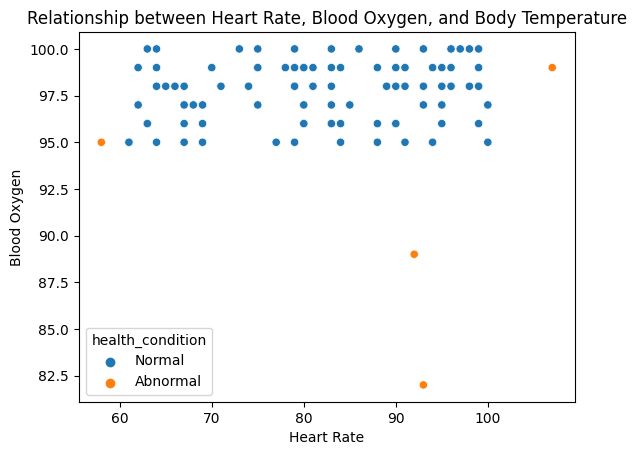

In [8]:
import seaborn as sns
# Plot a scatter plot to show the relationship between heart rate, blood oxygen, and body temperature
sns.scatterplot(x='heart_rate', y='blood_oxygen', data=train_data, hue='health_condition')
plt.title('Relationship between Heart Rate, Blood Oxygen, and Body Temperature')
plt.xlabel('Heart Rate')
plt.ylabel('Blood Oxygen')
plt.show()


C:\Users\praka\AppData\Local\Temp\ipykernel_7748\1128663569.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True)


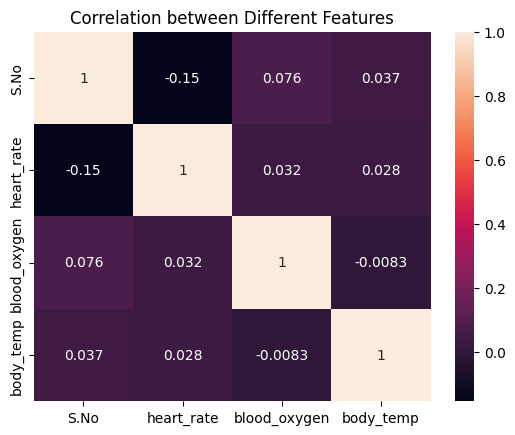

In [9]:
# Plot a heatmap to show the correlation between different features
sns.heatmap(train_data.corr(), annot=True)
plt.title('Correlation between Different Features')
plt.show()

Predicted health condition of unknown patients: ['Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Normal' 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Normal' 'Normal']
Best hyperparameters: {'subsample': 1, 'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 6, 'learning_rate': 1}
Classification report:
 {'Abnormal': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5}, 'Normal': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 94}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 99}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 99}}
Accuracy score: 1.0


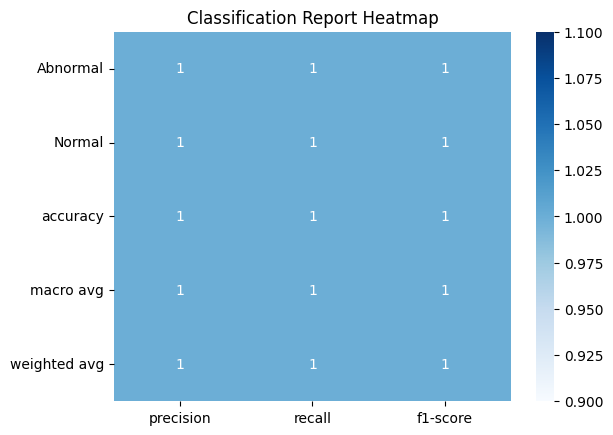

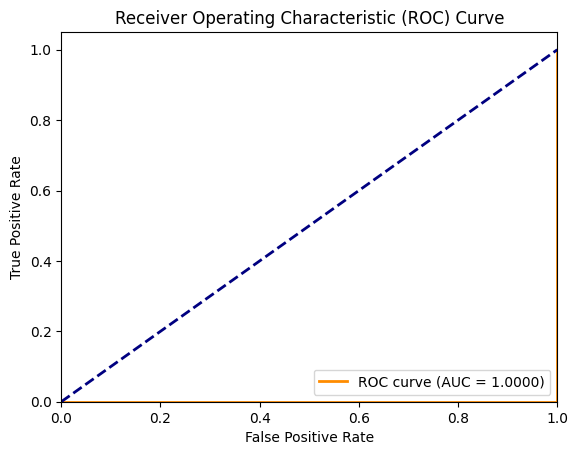

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the training data
train_data = pd.read_csv("D:/backup/Master_Thesis_Project/bu/7.csv")

# Split the train data into features and target
X_train = train_data[["heart_rate", "blood_oxygen", "body_temp"]]
y_train = train_data["health_condition"]

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier()

# Define the hyperparameter search space for Gradient Boosting Classifier
param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "learning_rate": [0.001, 0.01, 0.1, 1],
    "max_depth": [3, 4, 5, 6, 7],
    "min_samples_split": [2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "max_features": ["auto", "sqrt", "log2", None],
    "subsample": [0.6, 0.7, 0.8, 0.9, 1]
}

# Use RandomizedSearchCV to perform hyperparameter tuning on the Gradient Boosting Classifier
rs = RandomizedSearchCV(clf, param_grid, n_iter=100, cv=5, n_jobs=-1)
rs.fit(X_train, y_train)

# Load the unknown data
unknown_data = pd.read_csv("D:/backup/Master_Thesis_Project/bu/t30.csv")

# Predict the health condition of unknown patients using the tuned Gradient Boosting Classifier
prediction = rs.predict(unknown_data[["heart_rate", "blood_oxygen", "body_temp"]])

# Print the predicted health condition of each unknown patient
print("Predicted health condition of unknown patients:", prediction)

# Print the best hyperparameters found by RandomizedSearchCV
print("Best hyperparameters:", rs.best_params_)

# Print the classification report of the model
report = classification_report(y_train, rs.predict(X_train), digits=4, output_dict=True)
print("Classification report:\n", report)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_train, rs.predict(X_train))
print("Accuracy score:", accuracy)

# Generate classification report
report = classification_report(y_train, rs.predict(X_train), output_dict=True, zero_division=0)
classification_report_df = pd.DataFrame(report).transpose()

# Create a heatmap visualization of the classification report
sns.heatmap(classification_report_df.drop(['support'], axis=1), annot=True, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()

# Calculate predicted probabilities
probs = rs.predict_proba(X_train)

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_train, probs[:, 1], pos_label='Abnormal')
auc = roc_auc_score(y_train, probs[:, 1])

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Predicted health condition of unknown patients: ['Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Normal' 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Normal' 'Normal']
Best hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'entropy'}
Classification report:
 {'Abnormal': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5}, 'Normal': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 94}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 99}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 99}}
Accuracy score: 1.0


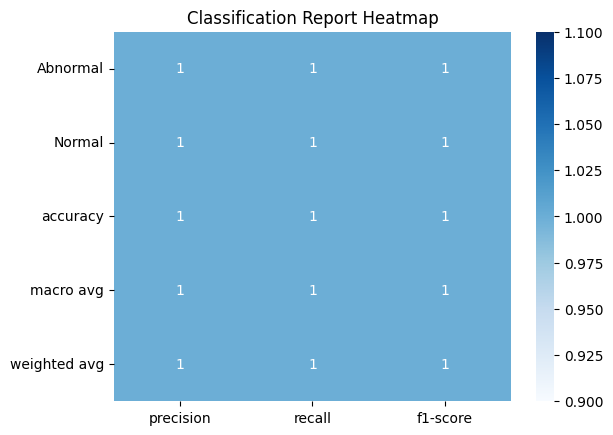

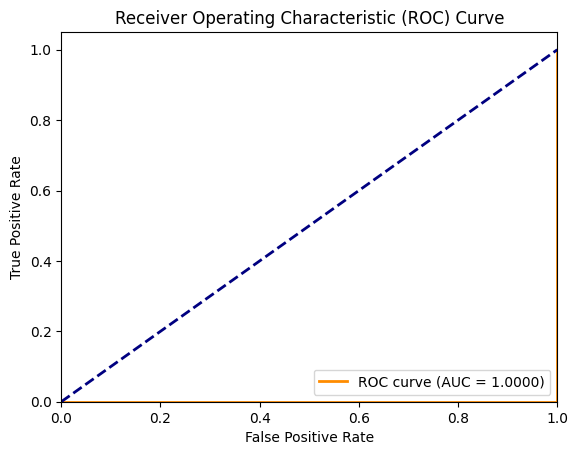

In [5]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the training data
train_data = pd.read_csv("D:/backup/Master_Thesis_Project/bu/7.csv")

# Split the train data into features and target
X_train = train_data[["heart_rate", "blood_oxygen", "body_temp"]]
y_train = train_data["health_condition"]

# Define the hyperparameter search space for Decision Tree Classifier
param_grid = {
    "max_depth": [None, 2, 4, 6, 8, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Use RandomizedSearchCV to perform hyperparameter tuning on the Decision Tree Classifier
rs = RandomizedSearchCV(clf, param_grid, n_iter=100, cv=5, n_jobs=-1)
rs.fit(X_train, y_train)

# Load the unknown data
unknown_data = pd.read_csv("D:/backup/Master_Thesis_Project/bu/t30.csv")

# Predict the health condition of unknown patients using the tuned Decision Tree Classifier
prediction = rs.predict(unknown_data[["heart_rate", "blood_oxygen", "body_temp"]])

# Print the predicted health condition of each unknown patient
print("Predicted health condition of unknown patients:", prediction)

# Print the best hyperparameters found by RandomizedSearchCV
print("Best hyperparameters:", rs.best_params_)

# Print the classification report of the model
report = classification_report(y_train, rs.predict(X_train), digits=4, output_dict=True)
print("Classification report:\n", report)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_train, rs.predict(X_train))
print("Accuracy score:", accuracy)

# generate classification report
report = classification_report(y_train, rs.predict(X_train), output_dict=True, zero_division=0)
classification_report_df = pd.DataFrame(report).transpose()

# Create a heatmap visualization of the classification report
sns.heatmap(classification_report_df.drop(['support'], axis=1), annot=True, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()

# Calculate predicted probabilities
probs = rs.predict_proba(X_train)

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_train, probs[:, 1], pos_label='Abnormal')
auc = roc_auc_score(y_train, probs[:, 1])

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


c:\Users\praka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Predicted health condition of unknown patients: ['Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Abnormal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Abnormal' 'Normal' 'Normal']
Best hyperparameters: {'var_smoothing': 1e-09}
Classification report:
 {'Abnormal': {'precision': 1.0, 'recall': 0.4, 'f1-score': 0.5714285714285715, 'support': 5}, 'Normal': {'precision': 0.9690721649484536, 'recall': 1.0, 'f1-score': 0.9842931937172774, 'support': 94}, 'accuracy': 0.9696969696969697, 'macro avg': {'precision': 0.9845360824742269, 'recall': 0.7, 'f1-score': 0.7778608825729245, 'support': 99}, 'weighted avg': {'precision': 0.9706341768197438, 'recall': 0.9696969696969697, 'f1-score': 0.9634414451168377, 'support': 99}}
Accuracy score: 0.9696969696969697


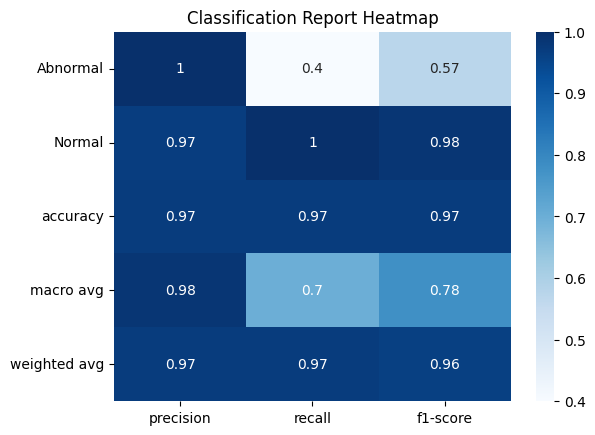

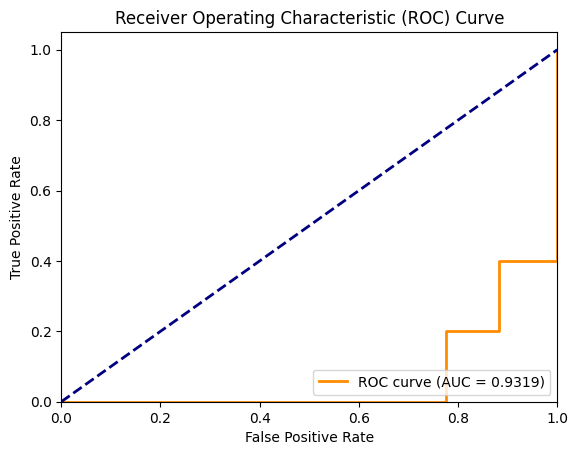

In [12]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the training data
train_data = pd.read_csv("D:/backup/Master_Thesis_Project/bu/7.csv")

# Split the train data into features and target
X_train = train_data[["heart_rate", "blood_oxygen", "body_temp"]]
y_train = train_data["health_condition"]

# Create a Naive Bayes Classifier
clf = GaussianNB()

# Define the hyperparameter search space for Naive Bayes Classifier
param_grid = {
    "var_smoothing": [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 1]
}

# Use RandomizedSearchCV to perform hyperparameter tuning on the Naive Bayes Classifier
rs = RandomizedSearchCV(clf, param_grid, n_iter=100, cv=5, n_jobs=-1)
rs.fit(X_train, y_train)

# Load the unknown data
unknown_data = pd.read_csv("D:/backup/Master_Thesis_Project/bu/t30.csv")

# Predict the health condition of unknown patients using the tuned Naive Bayes Classifier
prediction = rs.predict(unknown_data[["heart_rate", "blood_oxygen", "body_temp"]])

# Print the predicted health condition of each unknown patient
print("Predicted health condition of unknown patients:", prediction)

# Print the best hyperparameters found by RandomizedSearchCV
print("Best hyperparameters:", rs.best_params_)

# Print the classification report of the model
report = classification_report(y_train, rs.predict(X_train), digits=4, output_dict=True)
print("Classification report:\n", report)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_train, rs.predict(X_train))
print("Accuracy score:", accuracy)

# generate classification report
report = classification_report(y_train, rs.predict(X_train), output_dict=True, zero_division=0)
classification_report_df = pd.DataFrame(report).transpose()

# Create a heatmap visualization of the classification report
sns.heatmap(classification_report_df.drop(['support'], axis=1), annot=True, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()

# Calculate predicted probabilities
probs = rs.predict_proba(X_train)

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_train, probs[:, 1], pos_label='Abnormal')
auc = roc_auc_score(y_train, probs[:, 1])

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



Predicted health condition of unknown patients: ['Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Abnormal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal']
Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 6, 'criterion': 'gini'}
Classification report:
 {'Abnormal': {'precision': 1.0, 'recall': 0.6, 'f1-score': 0.7499999999999999, 'support': 5}, 'Normal': {'precision': 0.9791666666666666, 'recall': 1.0, 'f1-score': 0.9894736842105264, 'support': 94}, 'accuracy': 0.9797979797979798, 'macro avg': {'precision': 0.9895833333333333, 'recall': 0.8, 'f1-score': 0.8697368421052631, 'support': 99}, 'weighted avg': {'precision': 0.9802188552188551, 'recall': 0.9797979797979798, 'f1-score': 0.9773790536948432, 'support': 99}}
Accuracy score: 0.9797979797979798


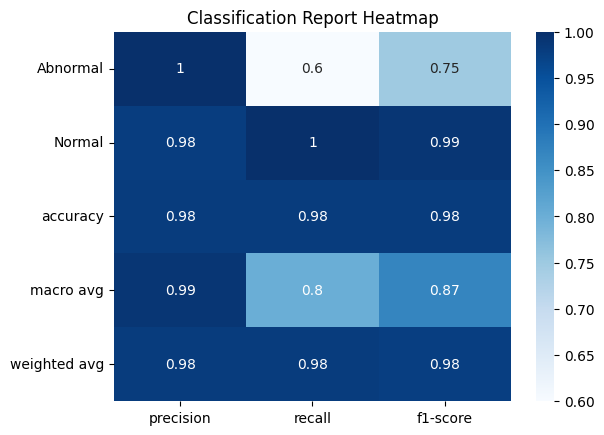

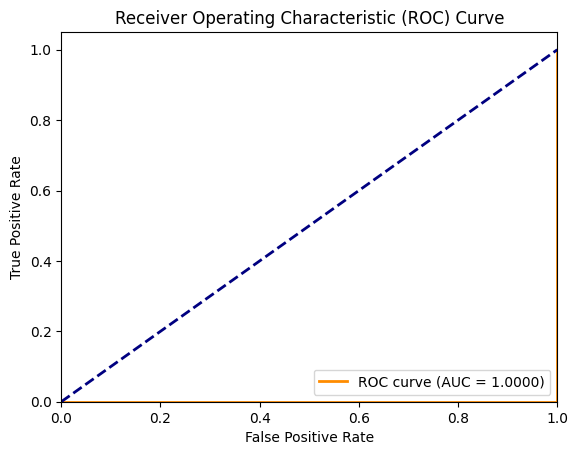

In [13]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the training data
train_data = pd.read_csv("D:/backup/Master_Thesis_Project/bu/7.csv")

# Split the train data into features and target
X_train = train_data[["heart_rate", "blood_oxygen", "body_temp"]]
y_train = train_data["health_condition"]

# Define the hyperparameter search space for Random forest Classifier
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 2, 4, 6, 8, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

# Create a Random forest Classifier
clf = RandomForestClassifier()

# Use RandomizedSearchCV to perform hyperparameter tuning on the Decision Tree Classifier
rs = RandomizedSearchCV(clf, param_grid, n_iter=100, cv=5, n_jobs=-1)
rs.fit(X_train, y_train)

# Load the unknown data
unknown_data = pd.read_csv("D:/backup/Master_Thesis_Project/bu/t30.csv")

# Predict the health condition of unknown patients using the tuned Decision Tree Classifier
prediction = rs.predict(unknown_data[["heart_rate", "blood_oxygen", "body_temp"]])

# Print the predicted health condition of each unknown patient
print("Predicted health condition of unknown patients:", prediction)

# Print the best hyperparameters found by RandomizedSearchCV
print("Best hyperparameters:", rs.best_params_)

# Print the classification report of the model
report = classification_report(y_train, rs.predict(X_train), digits=4, output_dict=True)
print("Classification report:\n", report)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_train, rs.predict(X_train))
print("Accuracy score:", accuracy)

# generate classification report
report = classification_report(y_train, rs.predict(X_train), output_dict=True, zero_division=0)
classification_report_df = pd.DataFrame(report).transpose()

# Create a heatmap visualization of the classification report
sns.heatmap(classification_report_df.drop(['support'], axis=1), annot=True, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()

# Calculate predicted probabilities
probs = rs.predict_proba(X_train)

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_train, probs[:, 1], pos_label='Abnormal')
auc = roc_auc_score(y_train, probs[:, 1])

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


c:\Users\praka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Predicted health condition of unknown patients: ['Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Normal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Abnormal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Normal' 'Normal']
Best hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'lbfgs'}
Classification report:
 {'Abnormal': {'precision': 1.0, 'recall': 0.8, 'f1-score': 0.888888888888889, 'support': 5}, 'Normal': {'precision': 0.9894736842105263, 'recall': 1.0, 'f1-score': 0.9947089947089947, 'support': 94}, 'accuracy': 0.98989898989899, 'macro avg': {'precision': 0.9947368421052631, 'recall': 0.9, 'f1-score': 0.9417989417989419, 'support': 99}, 'weighted avg': {'precision': 0.9900053163211058, 'recall': 0.98989898989899, 'f1-score': 0.9893645449201004, 'support': 99}}
Accuracy score: 0.989

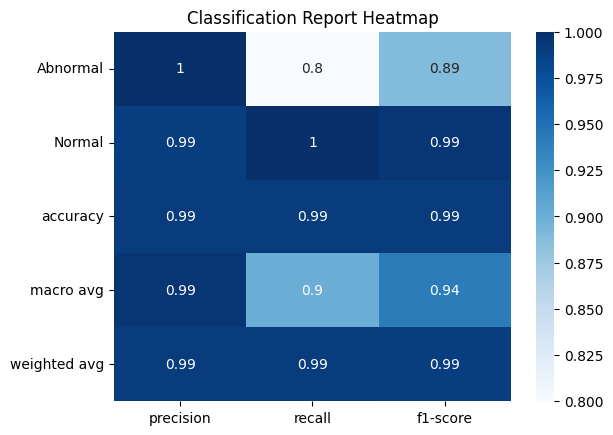

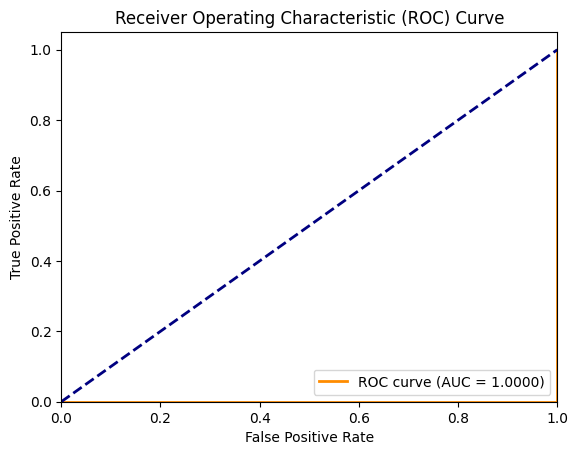

In [14]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the training data
train_data = pd.read_csv("D:/backup/Master_Thesis_Project/bu/7.csv")

# Split the train data into features and target
X_train = train_data[["heart_rate", "blood_oxygen", "body_temp"]]
y_train = train_data["health_condition"]

# Define the hyperparameter search space for MLP Classifier
param_grid = {
    "hidden_layer_sizes": [(10,), (50,), (100,), (10, 10), (50, 50), (100, 100)],
    "activation": ["identity", "logistic", "tanh", "relu"],
    "solver": ["lbfgs", "sgd", "adam"],
    "alpha": [0.0001, 0.001, 0.01, 0.1],
    "learning_rate": ["constant", "invscaling", "adaptive"],
    "max_iter": [100, 200, 500]
}

# Create an MLP Classifier
clf = MLPClassifier()

# Use GridSearchCV to perform hyperparameter tuning on the MLP Classifier
gs = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

# Load the unknown data
unknown_data = pd.read_csv("D:/backup/Master_Thesis_Project/bu/t30.csv")

# Predict the health condition of unknown patients using the tuned MLP Classifier
probabilities = gs.predict_proba(unknown_data[["heart_rate", "blood_oxygen", "body_temp"]])
prediction = gs.predict(unknown_data[["heart_rate", "blood_oxygen", "body_temp"]])

# Print the predicted health condition of each unknown patient
print("Predicted health condition of unknown patients:", prediction)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", gs.best_params_)

# Print the classification report of the model
report = classification_report(y_train, gs.predict(X_train), digits=4, output_dict=True)
print("Classification report:\n", report)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_train, gs.predict(X_train))
print("Accuracy score:", accuracy)

# generate classification report
report = classification_report(y_train, gs.predict(X_train), output_dict=True, zero_division=0)
classification_report_df = pd.DataFrame(report).transpose()

# Create a heatmap visualization of the classification report
sns.heatmap(classification_report_df.drop(['support'], axis=1), annot=True, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()

# Calculate predicted probabilities
probs = rs.predict_proba(X_train)

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_train, probs[:, 1], pos_label='Abnormal')
auc = roc_auc_score(y_train, probs[:, 1])

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



c:\Users\praka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 50 is smaller than n_iter=100. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\praka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\praka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_

Predicted health condition of unknown patients: ['Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Abnormal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Abnormal' 'Normal' 'Normal']
Best hyperparameters: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1}
Classification report:
 {'Abnormal': {'precision': 1.0, 'recall': 0.2, 'f1-score': 0.33333333333333337, 'support': 5}, 'Normal': {'precision': 0.9591836734693877, 'recall': 1.0, 'f1-score': 0.9791666666666666, 'support': 94}, 'accuracy': 0.9595959595959596, 'macro avg': {'precision': 0.9795918367346939, 'recall': 0.6, 'f1-score': 0.65625, 'support': 99}, 'weighted avg': {'precision': 0.9612451041022468, 'recall': 0.9595959595959596, 'f1-score': 0.9465488215488215, 'support': 99}}
Accuracy score: 0.9595959595959596


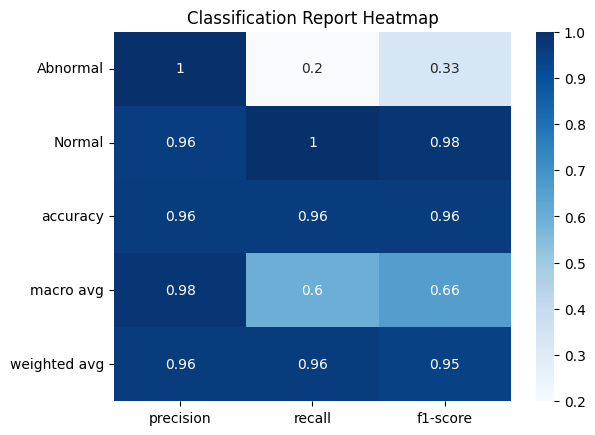

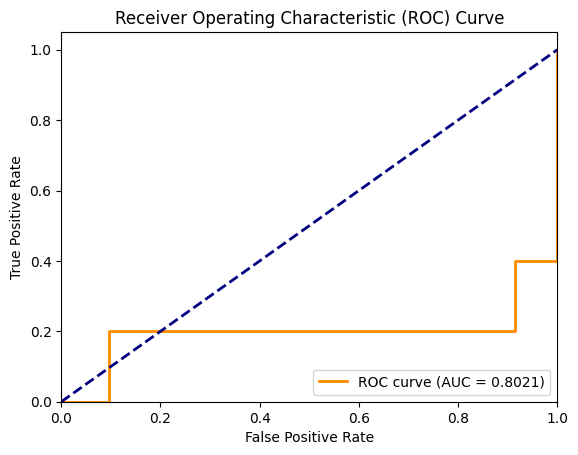

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data
train_data = pd.read_csv("D:/backup/Master_Thesis_Project/bu/7.csv")

# Split the train data into features and target
X_train = train_data[["heart_rate", "blood_oxygen", "body_temp"]]
y_train = train_data["health_condition"]

# Create a Logistic Regression Classifier
clf = LogisticRegression()

# Define the hyperparameter search space for Logistic Regression Classifier
param_grid = {
    "C": [0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2"],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Use RandomizedSearchCV to perform hyperparameter tuning on the Logistic Regression Classifier
rs = RandomizedSearchCV(clf, param_grid, n_iter=100, cv=5, n_jobs=-1)
rs.fit(X_train, y_train)

# Load the unknown data
unknown_data = pd.read_csv("D:/backup/Master_Thesis_Project/bu/t30.csv")

# Predict the health condition of unknown patients using the tuned Logistic Regression Classifier
prediction = rs.predict(unknown_data[["heart_rate", "blood_oxygen", "body_temp"]])

# Print the predicted health condition of each unknown patient
print("Predicted health condition of unknown patients:", prediction)

# Print the best hyperparameters found by RandomizedSearchCV
print("Best hyperparameters:", rs.best_params_)

# Print the classification report of the model
report = classification_report(y_train, rs.predict(X_train), digits=4, output_dict=True)
print("Classification report:\n", report)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_train, rs.predict(X_train))
print("Accuracy score:", accuracy)

# Generate classification report
report = classification_report(y_train, rs.predict(X_train), output_dict=True, zero_division=0)
classification_report_df = pd.DataFrame(report).transpose()

# Create a heatmap visualization of the classification report
sns.heatmap(classification_report_df.drop(['support'], axis=1), annot=True, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()

# Calculate predicted probabilities
probs = rs.predict_proba(X_train)

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_train, probs[:, 1], pos_label='Abnormal')
auc = roc_auc_score(y_train, probs[:, 1])

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
